# Scraping & EDA

## Problem Statement

This capstone aims to build a regression model with Houston Rockets data in order to predict how many three-point field goals the Philadelphia 76ers make in the upcoming NBA season.

## EDA

The basketball_reference_scraper is a python package that helps aggregate statistics on NBA teams, seasons, players, and games in a more efficient way.

In [45]:
# Install basketball_reference_scraper

#!pip install basketball-reference-scraper --upgrade

Requirement already up-to-date: basketball-reference-scraper in c:\users\david\appdata\roaming\python\python38\site-packages (1.0.26)


In [46]:
#!pip install unidecode --upgrade

Requirement already up-to-date: unidecode in c:\users\david\anaconda3\lib\site-packages (1.1.2)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import unidecode
from bs4 import BeautifulSoup

from basketball_reference_scraper.players import get_stats, get_game_logs
from basketball_reference_scraper.teams import get_roster, get_team_stats, get_opp_stats, get_roster_stats, get_team_misc

The 2017-2018 Houston Rockets is the team with the most 3-pointers made in an NBA season, with a total of 1,184 three-point field goals. Because of this, data from each player on the 17-18 Rockets will be scraped.

Disclaimer: the code below is a work in progress, so there are still errors I have to fix.

In [2]:
rockets_17_18_roster = ['Ryan Anderson', 'Trevor Ariza', 'Tarik Black',
                        'Bobby Brown', 'Markel Brown', 'Isaiah Canaan',
                        'Clint Capela', 'Eric Gordon', 'Gerald Green',
                        'James Harden', 'Nenê Hilário', 'R.J. Hunter',
                        'Aaron Jackson', 'Demetrius Jackson', 'Joe Johnson',
                        'Luc Mbah a Moute', 'Chinanu Onuaku', 'Chris Paul',
                        'Zhou Qi', 'Tim Quarterman', 'P.J. Tucker',
                        'Briante Weber', 'Troy Williams', 'Brandan Wright']

# Players with an AttributeError: Clint Capela, Nenê Hilário, 

In [84]:
# Aggregating 2017-2018 game logs for each Rockets player

rockets_17_18_logs = pd.DataFrame(data=None, columns=['PLAYER', 'DATE', 'AGE', 'TEAM', 'HOME/AWAY', 'OPPONENT',
                                                      'RESULT', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
                                                      '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
                                                      'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
                                                      'GAME_SCORE', '+/-'])

for player in rockets_17_18_roster:
    try:
        # Retrieve 2017-2018 game logs for each player
        log = get_game_logs(player, '2017-10-17', '2018-04-11', playoffs=False)
        
        # Add a Player column to the front of the dataframe
        # Referred to this page: https://www.geeksforgeeks.org/python-pandas-dataframe-insert/
        log.insert(0, 'PLAYER', player)
        
        # Concatenate rockets_17_18_logs and log
        rockets_17_18_logs = pd.concat([rockets_17_18_logs, log])

    except AttributeError:
        print(f"{player} has an AttributeError")
        print('')

You searched for "Ryan Anderson"
14 results found.
0: Ryan Anderson
1: Alan Anderson
2: Dan Anderson
3: Dan Anderson
4: Ron Anderson
5: Kyle Anderson
6: Eric Anderson
7: Greg Anderson
8: J.J. Anderson
9: Kenny Anderson
10: Kim Anderson
11: Nick Anderson
12: Alan Henderson
13: Ryan Robertson


Pick one:  0


Results for Ryan Anderson:

You searched for "Trevor Ariza"
1 result found.
Trevor Ariza
Results for Trevor Ariza:

You searched for "Tarik Black"
3 results found.
0: Tarik Black
1: Charlie Black
2: Tom Black


Pick one:  0


Results for Tarik Black:

You searched for "Bobby Brown"
14 results found.
0: Bobby Brown
1: Bob Brown
2: Tony Brown
3: Bobby Croft
4: Bruce Brown
5: John Brown
6: Larry Brown
7: Moses Brown
8: Randy Brown
9: Roger Brown
10: Roger Brown
11: Troy Brown
12: Bobby Cook
13: Bobby Lloyd


Pick one:  0


Results for Bobby Brown:

You searched for "Markel Brown"
14 results found.
0: Markel Brown
1: Darrell Brown
2: Marcus Brown
3: Mike Brown
4: Fred Brown
5: Harold Brown
6: Jaylen Brown
7: Larry Brown
8: Moses Brown
9: Myron Brown
10: Rickey Brown
11: Mark Crow
12: Mark Blount
13: Mark Bryant


Pick one:  0


Results for Markel Brown:

You searched for "Isaiah Canaan"
1 result found.
Isaiah Canaan
Results for Isaiah Canaan:

You searched for "Clint Capela"
3 results found.
0: Clint Capela
1: Clint Wager
2: Clint McDaniel


Pick one:  0


Results for Clint Capela:

Clint Capela has an AttributeError

You searched for "Eric Gordon"
12 results found.
0: Eric Gordon
1: Drew Gordon
2: Eric Dawson
3: Aaron Gordon
4: Ben Gordon
5: Paul Gordon
6: Erick Green
7: Eric Johnson
8: Phil Jordon
9: Eric Murdock
10: Eric Maynor
11: Eric Money


Pick one:  0


Results for Eric Gordon:

You searched for "Gerald Green"
6 results found.
0: Gerald Green
1: Gerald Brown
2: Gerald Govan
3: Gerald Glass
4: Erick Green
5: Sean Green


Pick one:  0


Results for Gerald Green:

You searched for "James Harden"
11 results found.
0: James Harden
1: James Hardy
2: James Bailey
3: Jimmy Darden
4: Jared Harper
5: James Edwards
6: James Lang
7: James Phelan
8: James Ennis
9: Jaylen Hoard
10: James Thomas


Pick one:  0


Results for James Harden:

You searched for "Nenê Hilário"
1 result found.
Nene Hilario
Results for Nene Hilario:

Nenê Hilário has an AttributeError

You searched for "R.J. Hunter"
4 results found.
0: R.J. Hunter
1: Les Hunter
2: P.J. Tucker
3: A.J. Wynder


Pick one:  0


Results for R.J. Hunter:

You searched for "Aaron Jackson"
16 results found.
0: Aaron Jackson
1: Jaren Jackson
2: Jaren Jackson
3: Myron Jackson
4: Marc Jackson
5: Mark Jackson
6: Aaron Harrison
7: Al Jackson
8: Frank Jackson
9: Greg Jackson
10: Mervin Jackson
11: Ralph Jackson
12: Tony Jackson
13: Tony Jackson
14: Aaron James
15: Aaron Swinson


Pick one:  0


Results for Aaron Jackson:



C:\Users\david\AppData\Roaming\Python\Python38\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


You searched for "Demetrius Jackson"
1 result found.
Demetrius Jackson
Results for Demetrius Jackson:

You searched for "Joe Johnson"
40 results found.
0: Joe Johnson
1: John Johnson
2: Lee Johnson
3: Ron Johnson
4: Dave Johnson
5: Ed Johnson
6: Gus Johnson
7: James Johnson
8: Ken Johnson
9: Ken Johnson
10: Stew Johnson
11: Trey Johnson
12: Joe Binion
13: Joe Dolhon
14: Alize Johnson
15: Amir Johnson
16: Andy Johnson
17: Armon Johnson
18: Arnie Johnson
19: Avery Johnson
20: B.J. Johnson
21: Brice Johnson
22: Buck Johnson
23: Clay Johnson
24: Eddie Johnson
25: Eddie Johnson
26: Eric Johnson
27: George Johnson
28: George Johnson
29: George Johnson
30: Ivan Johnson
31: Neil Johnson
32: Nick Johnson
33: Ollie Johnson
34: Rich Johnson
35: Steve Johnson
36: Tyler Johnson
37: Nate Johnston
38: Jim Johnstone
39: Joe Colone


Pick one:  0


Results for Joe Johnson:

You searched for "Luc Mbah a Moute"
1 result found.
Luc Mbah a Moute
Results for Luc Mbah a Moute:

You searched for "Chinanu Onuaku"
1 result found.
Chinanu Onuaku
Results for Chinanu Onuaku:

You searched for "Chris Paul"
15 results found.
0: Chris Paul
1: Chris Babb
2: Chris Carr
3: Chris Taft
4: Chris Bosh
5: Chris Ford
6: Chris Jent
7: Chris Kaman
8: Chris King
9: Chris Mihm
10: Chris Mills
11: Chris Munk
12: Charlie Paulk
13: Chris Welp
14: Chris Silva


Pick one:  0


Results for Chris Paul:

You searched for "Zhou Qi"
1 result found.
Zhou Qi
Results for Zhou Qi:

You searched for "Tim Quarterman"
1 result found.
Tim Quarterman
Results for Tim Quarterman:

You searched for "P.J. Tucker"
5 results found.
0: P.J. Tucker
1: R.J. Hunter
2: Al Tucker
3: Jim Tucker
4: B.J. Tyler


Pick one:  0


Results for P.J. Tucker:

You searched for "Briante Weber"
1 result found.
Briante Weber
Results for Briante Weber:

You searched for "Troy Williams"
46 results found.
0: Troy Williams
1: Ray Williams
2: Rob Williams
3: Ron Williams
4: Aaron Williams
5: Art Williams
6: Bob Williams
7: Corey Williams
8: Deron Williams
9: Eric Williams
10: Fly Williams
11: Guy Williams
12: Jay Williams
13: Lou Williams
14: Mo Williams
15: Sly Williams
16: Al Williams
17: Alan Williams
18: Buck Williams
19: C.J. Williams
20: Duck Williams
21: Earl Williams
22: Frank Williams
23: Gene Williams
24: Grant Williams
25: Gus Williams
26: Hank Williams
27: Herb Williams
28: Hot Rod Williams
29: Jason Williams
30: Jerome Williams
31: John Williams
32: Kenny Williams
33: Matt Williams
34: Mike Williams
35: Milt Williams
36: Monty Williams
37: Nate Williams
38: Pete Williams
39: Sam Williams
40: Sam Williams
41: Scott Williams
42: Sean Williams
43: Travis Williams
44: Walt Williams
45: Ward Williams


Pick one:  0


Results for Troy Williams:

You searched for "Brandan Wright"
5 results found.
0: Brandan Wright
1: Brandin Knight
2: Brandon Knight
3: Brad Wright
4: Bracey Wright


Pick one:  0


Results for Brandan Wright:



In [85]:
rockets_17_18_logs

,PLAYER,DATE,AGE,TEAM,HOME/AWAY,OPPONENT,RESULT,GS,MP,FG,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GAME_SCORE,+/-
0,Ryan Anderson,2017-10-17,29-164,HOU,AWAY,GSW,W (+1),1,33:17,5,...,5,8,1,1,1,0,3,13,11.4,+8
1,Ryan Anderson,2017-10-18,29-165,HOU,AWAY,SAC,W (+5),1,25:41,2,...,4,5,0,0,0,0,1,10,7.4,+5
2,Ryan Anderson,2017-10-21,29-168,HOU,HOME,DAL,W (+16),1,23:04,1,...,9,10,1,0,0,0,0,3,4.7,+19
3,Ryan Anderson,2017-10-23,29-170,HOU,HOME,MEM,L (-8),1,31:10,2,...,3,6,2,0,0,0,4,5,3.7,+12
4,Ryan Anderson,2017-10-25,29-172,HOU,AWAY,PHI,W (+1),1,35:03,5,...,1,1,0,1,1,1,0,14,9.3,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,P.J. Tucker,2018-04-07,32-337,HOU,HOME,OKC,L (-6),1,27:42,6,...,9,10,3,0,0,2,5,16,14.3,+3
84,P.J. Tucker,2018-04-10,32-340,HOU,AWAY,LAL,W (+6),1,22:29,2,...,8,8,0,0,1,1,2,6,3.9,-9
85,P.J. Tucker,2018-04-11,32-341,HOU,AWAY,SAC,L (-13),1,29:09,1,...,7,10,1,0,0,2,1,3,1.0,-8
76,Troy Williams,2018-03-31,23-091,NYK,HOME,DET,L (-6),1,32:48,3,...,2,4,2,1,0,2,2,11,8.2,+6


In [5]:
# Save dataframe in a csv file

rockets_17_18_logs.to_csv('./data/rockets_17_18_logs.csv', index=False)

In [3]:
rockets_17_18_logs = pd.read_csv('./data/rockets_17_18_logs.csv')
rockets_17_18_logs.head()

,PLAYER,DATE,AGE,TEAM,HOME/AWAY,OPPONENT,RESULT,GS,MP,FG,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GAME_SCORE,+/-
0,Ryan Anderson,2017-10-17,29-164,HOU,AWAY,GSW,W (+1),1,33:17,5,...,5,8,1,1,1,0,3,13,11.4,8
1,Ryan Anderson,2017-10-18,29-165,HOU,AWAY,SAC,W (+5),1,25:41,2,...,4,5,0,0,0,0,1,10,7.4,5
2,Ryan Anderson,2017-10-21,29-168,HOU,HOME,DAL,W (+16),1,23:04,1,...,9,10,1,0,0,0,0,3,4.7,19
3,Ryan Anderson,2017-10-23,29-170,HOU,HOME,MEM,L (-8),1,31:10,2,...,3,6,2,0,0,0,4,5,3.7,12
4,Ryan Anderson,2017-10-25,29-172,HOU,AWAY,PHI,W (+1),1,35:03,5,...,1,1,0,1,1,1,0,14,9.3,-1


In [4]:
clint_capela_log = pd.read_csv('./data/ClintCapela_17_18_log.csv')
clint_capela_log.head()

,Rk,G,Date,Age,Tm,Column1,Opp,2,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1.0,10/17/2017,23-152,HOU,@,GSW,W (+1),1,18:10,...,3,4,0,1,1,2,0,12,8.3,-23
1,2,2.0,10/18/2017,23-153,HOU,@,SAC,W (+5),1,28:20,...,12,17,1,3,1,2,2,22,26.3,+9
2,3,3.0,10/21/2017,23-156,HOU,NaN,DAL,W (+16),1,20:59,...,7,10,2,0,0,0,4,13,13.4,+10
3,4,4.0,10/23/2017,23-158,HOU,NaN,MEM,L (-8),1,24:44,...,5,6,0,1,2,0,5,14,13.1,0
4,5,5.0,10/25/2017,23-160,HOU,@,PHI,W (+1),1,31:30,...,14,20,2,1,4,2,4,16,22.5,+9


In [5]:
# Function to clean Clint Capela's and Nenê Hilário's game logs

def log_cleaner(log, name):
    # Drop 'Rk' and 'G' columns
    log.drop(['Rk', 'G'], axis=1, inplace=True)
    
    # Add a Player column to the front of the dataframe
    # Referred to this page: https://www.geeksforgeeks.org/python-pandas-dataframe-insert/
    log.insert(0, 'PLAYER', name)
    
    # Match the column titles with the titles in 'rockets_17_18_logs'
    log.columns = ['PLAYER', 'DATE', 'AGE', 'TEAM', 'HOME/AWAY', 'OPPONENT', 'RESULT',
       'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'GAME_SCORE', '+/-']
    
    # Chnage '@' values to 'AWAY' and null values to 'HOME' in the 'HOME/AWAY' column
    log['HOME/AWAY'] = log['HOME/AWAY'].map({'@': 'AWAY'})
    log['HOME/AWAY'].fillna('HOME', inplace=True)
    
    # Change 'DATE' column to datetime format (YYYY-MM-DD)
    # Referred to this page: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
    log['DATE'] = pd.to_datetime(log['DATE'])
    
    # Drop rows where the player did not dress/play, was not with the team, and was listed as inactive
    drop_list = ['Did Not Dress', 'Did Not Play', 'Inactive', 'Not With Team']
    for i in drop_list:
        drop_row = log[log['GS'] == i].index
        log.drop(drop_row, inplace=True)
    
    # Change columns with numeric values to numeric datatypes
    log_num_col = ['GS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'GAME_SCORE', '+/-']
    
    for col in log_num_col:
        log[col] = pd.to_numeric(log[col])
    
    return log

In [6]:
clint_capela_log = log_cleaner(clint_capela_log, 'Clint Capela')

In [7]:
clint_capela_log.head()

,PLAYER,DATE,AGE,TEAM,HOME/AWAY,OPPONENT,RESULT,GS,MP,FG,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GAME_SCORE,+/-
0,Clint Capela,2017-10-17,23-152,HOU,AWAY,GSW,W (+1),1,18:10,6,...,3,4,0,1,1,2,0,12,8.3,-23
1,Clint Capela,2017-10-18,23-153,HOU,AWAY,SAC,W (+5),1,28:20,10,...,12,17,1,3,1,2,2,22,26.3,9
2,Clint Capela,2017-10-21,23-156,HOU,HOME,DAL,W (+16),1,20:59,5,...,7,10,2,0,0,0,4,13,13.4,10
3,Clint Capela,2017-10-23,23-158,HOU,HOME,MEM,L (-8),1,24:44,7,...,5,6,0,1,2,0,5,14,13.1,0
4,Clint Capela,2017-10-25,23-160,HOU,AWAY,PHI,W (+1),1,31:30,7,...,14,20,2,1,4,2,4,16,22.5,9


In [8]:
nene_hilario_log = pd.read_csv('./data/NeneHilario_17_18_log.csv')
nene_hilario_log.head()

,Rk,G,Date,Age,Tm,Column1,Opp,2,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,NaN,10/17/2017,35-034,HOU,@,GSW,W (+1),Did Not Play,Did Not Play,...,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play,Did Not Play
1,2,1.0,10/18/2017,35-035,HOU,@,SAC,W (+5),0,17:37,...,3,4,1,1,0,1,2,9,8.2,-1
2,3,2.0,10/21/2017,35-038,HOU,NaN,DAL,W (+16),0,10:14,...,1,2,0,0,0,0,3,14,11.6,+6
3,4,3.0,10/23/2017,35-040,HOU,NaN,MEM,L (-8),0,15:49,...,2,3,1,0,0,1,3,9,6.2,-2
4,5,NaN,10/25/2017,35-042,HOU,@,PHI,W (+1),Inactive,Inactive,...,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive


In [9]:
nene_hilario_log = log_cleaner(nene_hilario_log, 'Nenê Hilário')

In [10]:
nene_hilario_log.head()

,PLAYER,DATE,AGE,TEAM,HOME/AWAY,OPPONENT,RESULT,GS,MP,FG,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GAME_SCORE,+/-
1,Nenê Hilário,2017-10-18,35-035,HOU,AWAY,SAC,W (+5),0,17:37,3,...,3,4,1,1,0,1,2,9,8.2,-1
2,Nenê Hilário,2017-10-21,35-038,HOU,HOME,DAL,W (+16),0,10:14,6,...,1,2,0,0,0,0,3,14,11.6,6
3,Nenê Hilário,2017-10-23,35-040,HOU,HOME,MEM,L (-8),0,15:49,4,...,2,3,1,0,0,1,3,9,6.2,-2
6,Nenê Hilário,2017-10-28,35-045,HOU,AWAY,MEM,L (-14),0,14:54,2,...,1,1,1,0,0,2,4,4,-1.3,-19
7,Nenê Hilário,2017-10-30,35-047,HOU,HOME,PHI,L (-8),0,10:29,1,...,2,3,1,0,1,0,2,7,6.3,-9


In [11]:
# Concatenate rockets_17_18_logs and clint_capela_log

rockets_17_18_logs = pd.concat([rockets_17_18_logs, clint_capela_log])

In [12]:
# Concatenate rockets_17_18_logs and nene_hilario_log

rockets_17_18_logs = pd.concat([rockets_17_18_logs, nene_hilario_log])

In [13]:
rockets_17_18_logs

,PLAYER,DATE,AGE,TEAM,HOME/AWAY,OPPONENT,RESULT,GS,MP,FG,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GAME_SCORE,+/-
0,Ryan Anderson,2017-10-17,29-164,HOU,AWAY,GSW,W (+1),1,33:17,5,...,5,8,1,1,1,0,3,13,11.4,8
1,Ryan Anderson,2017-10-18,29-165,HOU,AWAY,SAC,W (+5),1,25:41,2,...,4,5,0,0,0,0,1,10,7.4,5
2,Ryan Anderson,2017-10-21,29-168,HOU,HOME,DAL,W (+16),1,23:04,1,...,9,10,1,0,0,0,0,3,4.7,19
3,Ryan Anderson,2017-10-23,29-170,HOU,HOME,MEM,L (-8),1,31:10,2,...,3,6,2,0,0,0,4,5,3.7,12
4,Ryan Anderson,2017-10-25,29-172,HOU,AWAY,PHI,W (+1),1,35:03,5,...,1,1,0,1,1,1,0,14,9.3,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Nenê Hilário,2018-03-25 00:00:00,35-193,HOU,HOME,ATL,W (+19),0,14:50,1,...,3,3,1,1,1,1,3,2,1.4,13
74,Nenê Hilário,2018-03-27 00:00:00,35-195,HOU,HOME,CHI,W (+32),1,20:33,4,...,4,7,3,3,0,0,0,10,15.1,32
77,Nenê Hilário,2018-04-03 00:00:00,35-202,HOU,HOME,WAS,W (+16),0,15:13,2,...,5,8,0,1,0,0,2,7,6.5,7
79,Nenê Hilário,2018-04-07 00:00:00,35-206,HOU,HOME,OKC,L (-6),0,13:43,0,...,0,1,1,0,0,1,4,2,-1.4,1


In [14]:
rockets_17_18_logs.shape

(464, 29)

In [15]:
# Change 'HOME/AWAY' column to binary (HOME = 1, AWAY = 0)

rockets_17_18_logs['HOME/AWAY'] = rockets_17_18_logs['HOME/AWAY'].map({'HOME': 1 , 'AWAY': 0})

In [16]:
rockets_17_18_logs

,PLAYER,DATE,AGE,TEAM,HOME/AWAY,OPPONENT,RESULT,GS,MP,FG,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GAME_SCORE,+/-
0,Ryan Anderson,2017-10-17,29-164,HOU,0,GSW,W (+1),1,33:17,5,...,5,8,1,1,1,0,3,13,11.4,8
1,Ryan Anderson,2017-10-18,29-165,HOU,0,SAC,W (+5),1,25:41,2,...,4,5,0,0,0,0,1,10,7.4,5
2,Ryan Anderson,2017-10-21,29-168,HOU,1,DAL,W (+16),1,23:04,1,...,9,10,1,0,0,0,0,3,4.7,19
3,Ryan Anderson,2017-10-23,29-170,HOU,1,MEM,L (-8),1,31:10,2,...,3,6,2,0,0,0,4,5,3.7,12
4,Ryan Anderson,2017-10-25,29-172,HOU,0,PHI,W (+1),1,35:03,5,...,1,1,0,1,1,1,0,14,9.3,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Nenê Hilário,2018-03-25 00:00:00,35-193,HOU,1,ATL,W (+19),0,14:50,1,...,3,3,1,1,1,1,3,2,1.4,13
74,Nenê Hilário,2018-03-27 00:00:00,35-195,HOU,1,CHI,W (+32),1,20:33,4,...,4,7,3,3,0,0,0,10,15.1,32
77,Nenê Hilário,2018-04-03 00:00:00,35-202,HOU,1,WAS,W (+16),0,15:13,2,...,5,8,0,1,0,0,2,7,6.5,7
79,Nenê Hilário,2018-04-07 00:00:00,35-206,HOU,1,OKC,L (-6),0,13:43,0,...,0,1,1,0,0,1,4,2,-1.4,1


In [17]:
rockets_17_18_logs.dtypes

PLAYER         object
DATE           object
AGE            object
TEAM           object
HOME/AWAY       int64
OPPONENT       object
RESULT         object
GS              int64
MP             object
FG              int64
FGA             int64
FG%           float64
3P              int64
3PA             int64
3P%           float64
FT              int64
FTA             int64
FT%           float64
ORB             int64
DRB             int64
TRB             int64
AST             int64
STL             int64
BLK             int64
TOV             int64
PF              int64
PTS             int64
GAME_SCORE    float64
+/-             int64
dtype: object

In [18]:
rockets_17_18_logs.isnull().sum()

PLAYER          0
DATE            0
AGE             0
TEAM            0
HOME/AWAY       0
OPPONENT        0
RESULT          0
GS              0
MP              0
FG              0
FGA             0
FG%             1
3P              0
3PA             0
3P%           127
FT              0
FTA             0
FT%           124
ORB             0
DRB             0
TRB             0
AST             0
STL             0
BLK             0
TOV             0
PF              0
PTS             0
GAME_SCORE      0
+/-             0
dtype: int64

In [19]:
# Show rows with a null FT%
rockets_17_18_logs[['FT', 'FTA', 'FT%']][rockets_17_18_logs['FT%'].isnull()]

,FT,FTA,FT%
0,0,0,NaN
2,0,0,NaN
3,0,0,NaN
4,0,0,NaN
9,0,0,NaN
...,...,...,...
51,0,0,NaN
61,0,0,NaN
66,0,0,NaN
73,0,0,NaN


The values in the 'FT%' column shown above are null because there were no free throws or free throw attempts on those days. Therefore, those null values will be changed to zero.

In [20]:
# Change null value to zero

rockets_17_18_logs['FT%'].fillna(0, inplace=True)
rockets_17_18_logs.isnull().sum()

PLAYER          0
DATE            0
AGE             0
TEAM            0
HOME/AWAY       0
OPPONENT        0
RESULT          0
GS              0
MP              0
FG              0
FGA             0
FG%             1
3P              0
3PA             0
3P%           127
FT              0
FTA             0
FT%             0
ORB             0
DRB             0
TRB             0
AST             0
STL             0
BLK             0
TOV             0
PF              0
PTS             0
GAME_SCORE      0
+/-             0
dtype: int64

In [21]:
# Show row with a null FG%
rockets_17_18_logs[['FG', 'FGA', 'FG%']][rockets_17_18_logs['FG%'].isnull()]

,FG,FGA,FG%
93,0,0,NaN


Just like the null values in the 'FT%' column, the value for 'FG%' is null in this case because there were no field goals or field goal attempts on this day. Therefore, the null value will be changed to zero.

In [22]:
# Change null value to zero

rockets_17_18_logs['FG%'].fillna(0, inplace=True)
rockets_17_18_logs.isnull().sum()

PLAYER          0
DATE            0
AGE             0
TEAM            0
HOME/AWAY       0
OPPONENT        0
RESULT          0
GS              0
MP              0
FG              0
FGA             0
FG%             0
3P              0
3PA             0
3P%           127
FT              0
FTA             0
FT%             0
ORB             0
DRB             0
TRB             0
AST             0
STL             0
BLK             0
TOV             0
PF              0
PTS             0
GAME_SCORE      0
+/-             0
dtype: int64

In [23]:
# Show row with a null 3P%
rockets_17_18_logs[['3P', '3PA', '3P%']][rockets_17_18_logs['3P%'].isnull()]

,3P,3PA,3P%
49,0,0,NaN
93,0,0,NaN
117,0,0,NaN
337,0,0,NaN
0,0,0,NaN
...,...,...,...
73,0,0,NaN
74,0,0,NaN
77,0,0,NaN
79,0,0,NaN


Just like the previous instances of null values, these values for '3P%' are null because there were no 3-pointers or 3-point attempts on these days. The '3P%' null values will be changed to zero.

In [24]:
# Change null value to zero

rockets_17_18_logs['3P%'].fillna(0, inplace=True)
rockets_17_18_logs.isnull().sum()

PLAYER        0
DATE          0
AGE           0
TEAM          0
HOME/AWAY     0
OPPONENT      0
RESULT        0
GS            0
MP            0
FG            0
FGA           0
FG%           0
3P            0
3PA           0
3P%           0
FT            0
FTA           0
FT%           0
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
GAME_SCORE    0
+/-           0
dtype: int64

In [25]:
# Analyze the numerical data

rockets_log_num = rockets_17_18_logs._get_numeric_data()

In [26]:
rockets_log_num

,HOME/AWAY,GS,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GAME_SCORE,+/-
0,0,1,5,12,0.417,3,8,0.375,0,0,...,5,8,1,1,1,0,3,13,11.4,8
1,0,1,2,7,0.286,2,7,0.286,4,4,...,4,5,0,0,0,0,1,10,7.4,5
2,1,1,1,4,0.250,1,4,0.250,0,0,...,9,10,1,0,0,0,0,3,4.7,19
3,1,1,2,7,0.286,1,4,0.250,0,0,...,3,6,2,0,0,0,4,5,3.7,12
4,0,1,5,11,0.455,4,9,0.444,0,0,...,1,1,0,1,1,1,0,14,9.3,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,1,0,1,3,0.333,0,0,0.000,0,0,...,3,3,1,1,1,1,3,2,1.4,13
74,1,1,4,7,0.571,0,0,0.000,2,2,...,4,7,3,3,0,0,0,10,15.1,32
77,1,0,2,5,0.400,0,0,0.000,3,7,...,5,8,0,1,0,0,2,7,6.5,7
79,1,0,0,2,0.000,0,0,0.000,2,4,...,0,1,1,0,0,1,4,2,-1.4,1


In [27]:
rockets_log_num.columns

Index(['HOME/AWAY', 'GS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'GAME_SCORE', '+/-'],
      dtype='object')

In [28]:
# Drop Columns Deemed Unnecessary

rockets_log_num.drop(['GS', 'ORB', 'DRB', 'STL', 'BLK', 'TOV', 'PF'], axis=1, inplace=True)

In [29]:
rockets_log_num

,HOME/AWAY,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,TRB,AST,PTS,GAME_SCORE,+/-
0,0,5,12,0.417,3,8,0.375,0,0,0.000,8,1,13,11.4,8
1,0,2,7,0.286,2,7,0.286,4,4,1.000,5,0,10,7.4,5
2,1,1,4,0.250,1,4,0.250,0,0,0.000,10,1,3,4.7,19
3,1,2,7,0.286,1,4,0.250,0,0,0.000,6,2,5,3.7,12
4,0,5,11,0.455,4,9,0.444,0,0,0.000,1,0,14,9.3,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,1,1,3,0.333,0,0,0.000,0,0,0.000,3,1,2,1.4,13
74,1,4,7,0.571,0,0,0.000,2,2,1.000,7,3,10,15.1,32
77,1,2,5,0.400,0,0,0.000,3,7,0.429,8,0,7,6.5,7
79,1,0,2,0.000,0,0,0.000,2,4,0.500,1,1,2,-1.4,1


In [65]:
rockets_log_num['3P'].describe()

count    464.000000
mean       1.920259
std        1.953039
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max        8.000000
Name: 3P, dtype: float64

In [30]:
rockets_log_num['3P'].value_counts()

0    168
3     70
1     68
2     55
4     48
5     27
6     22
7      4
8      2
Name: 3P, dtype: int64

In [31]:
rockets_log_num['3P'].value_counts(normalize=True)

0    0.362069
3    0.150862
1    0.146552
2    0.118534
4    0.103448
5    0.058190
6    0.047414
7    0.008621
8    0.004310
Name: 3P, dtype: float64

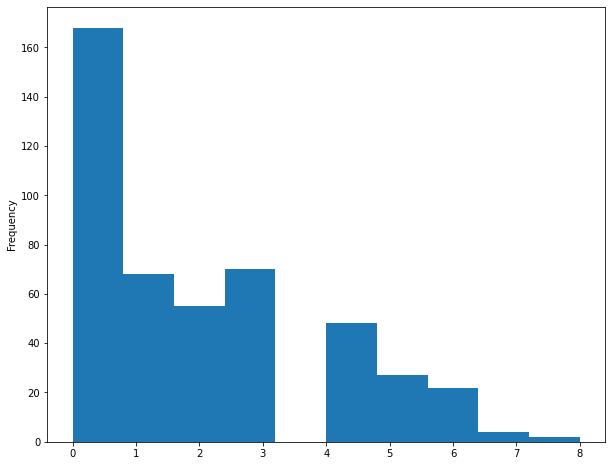

In [67]:
# Plot bar chart showing 

plt.figure(figsize=(10, 8))
rockets_log_num['3P'].plot(kind='hist');

<Figure size 1152x720 with 0 Axes>

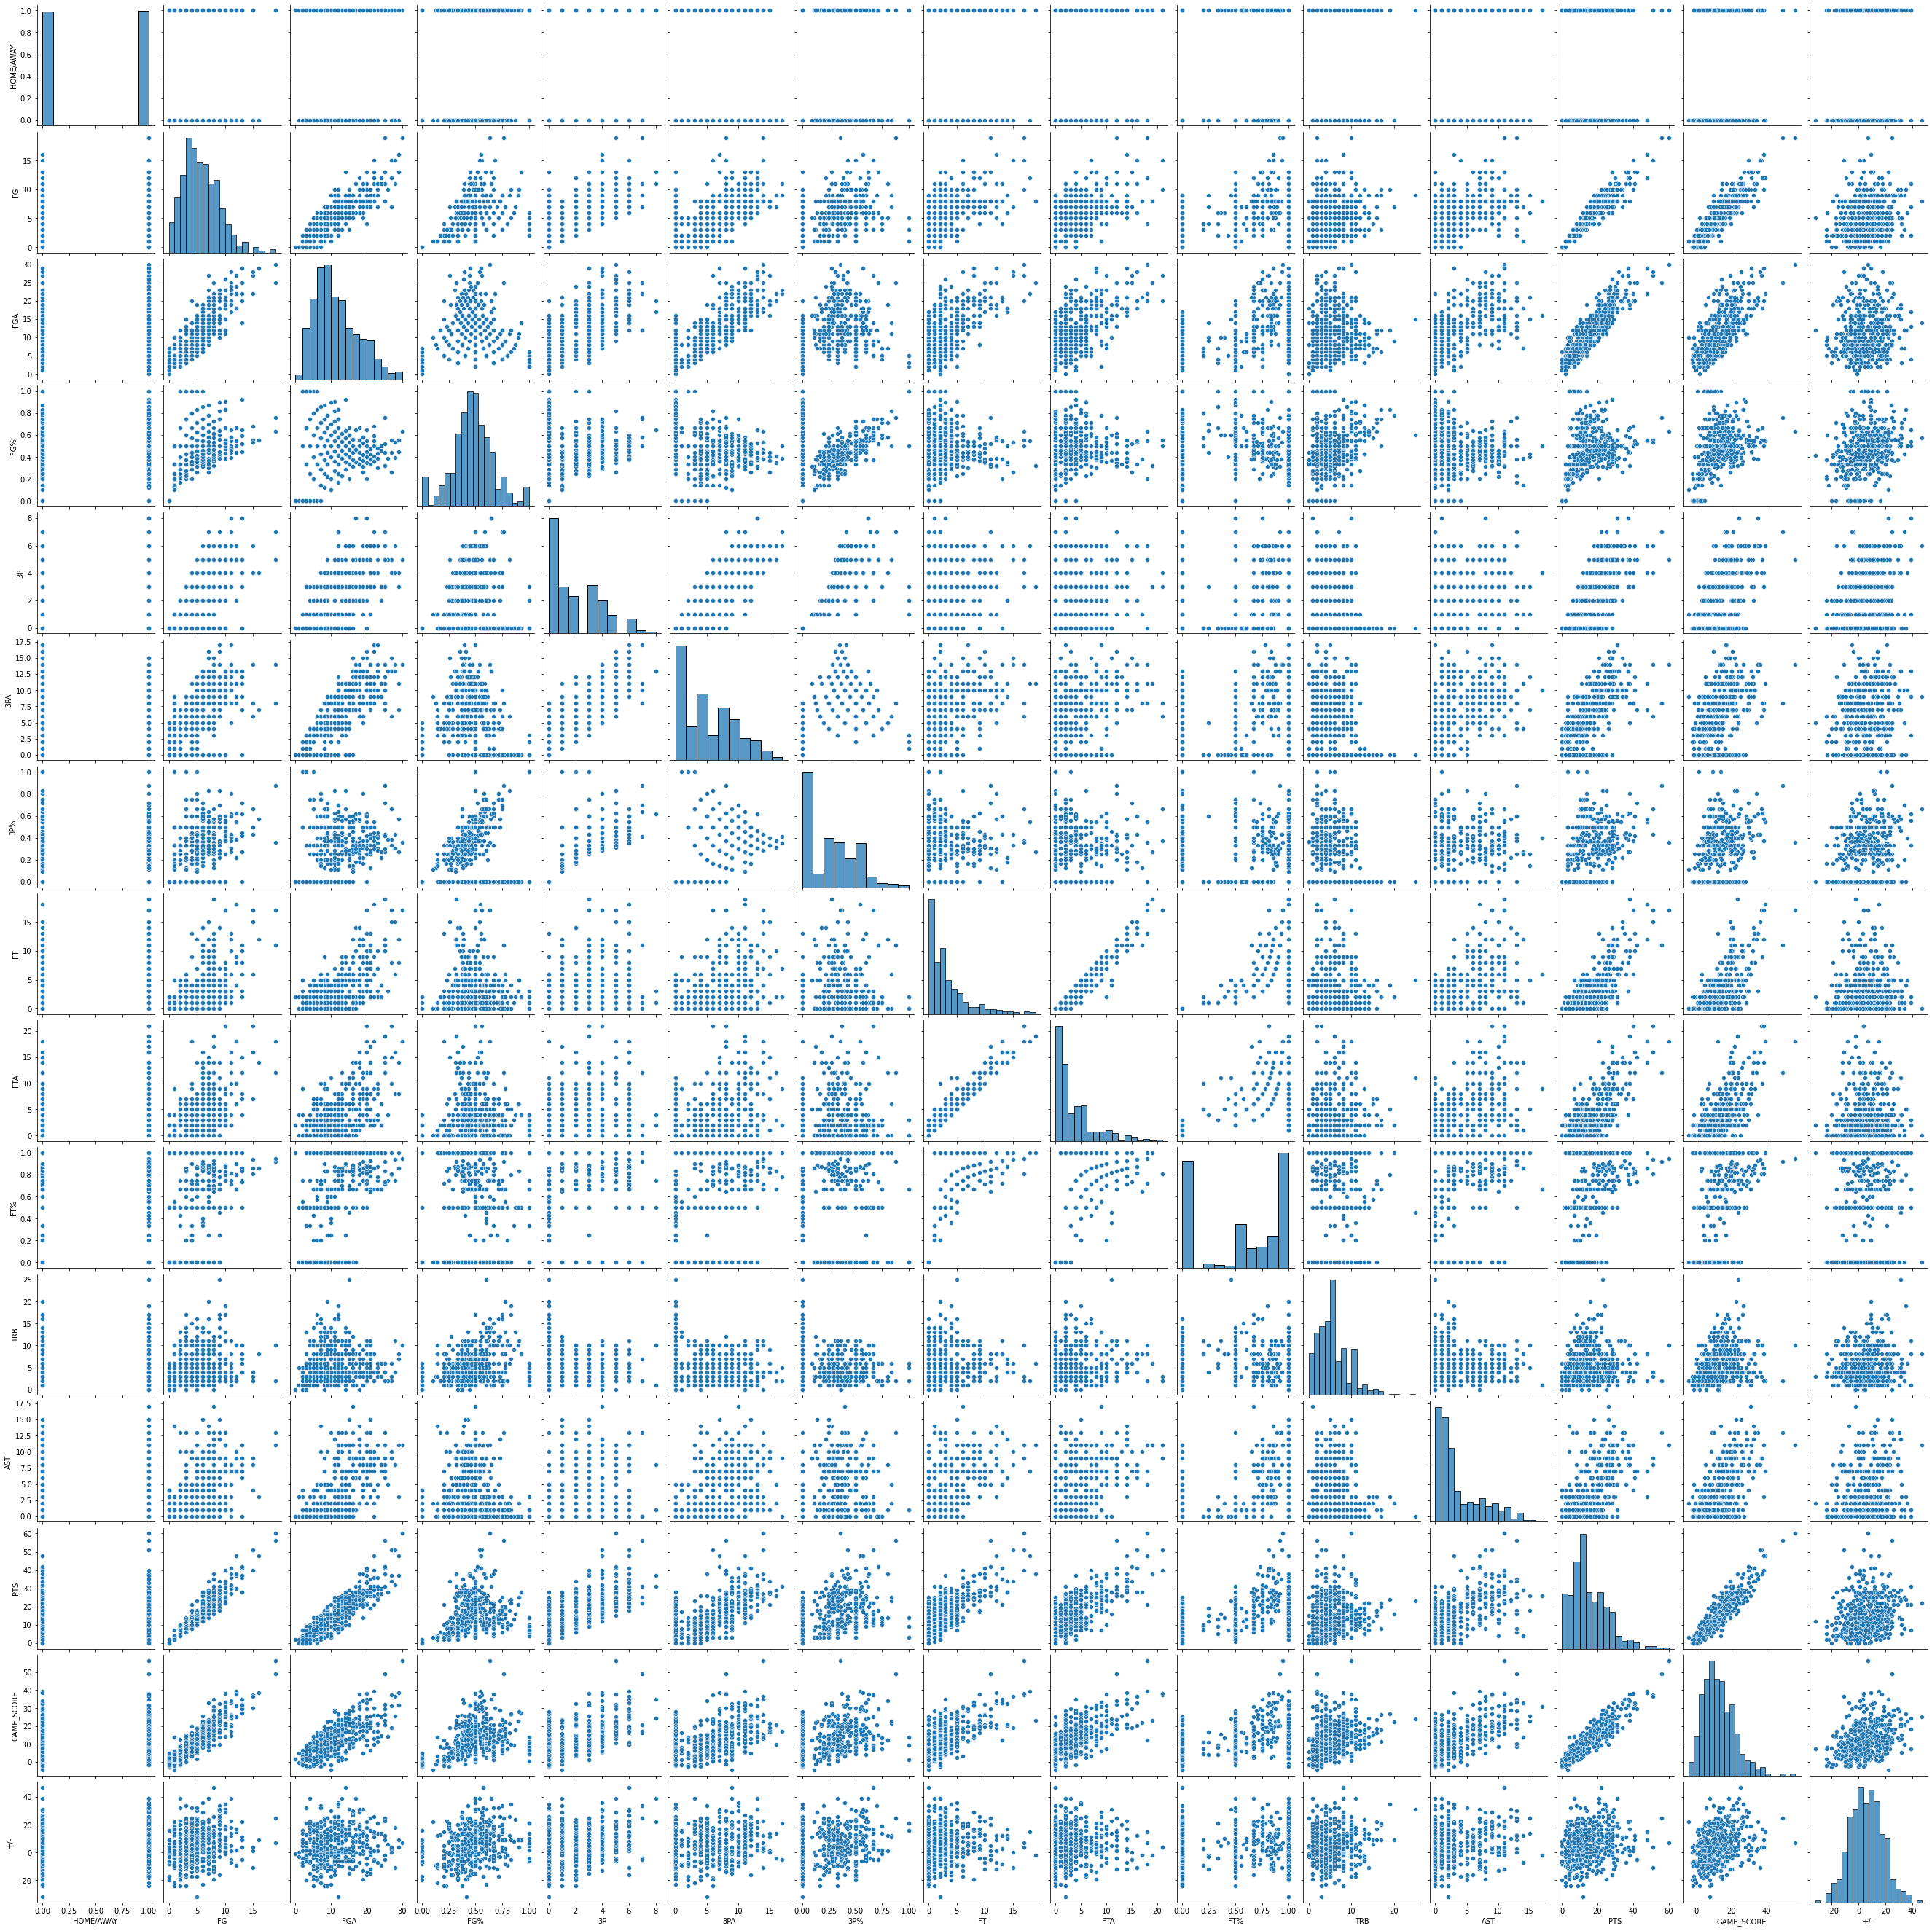

In [79]:
# Show pairplots

plt.figure(figsize=(16, 10))
sns.pairplot(rockets_log_num);

<AxesSubplot:>

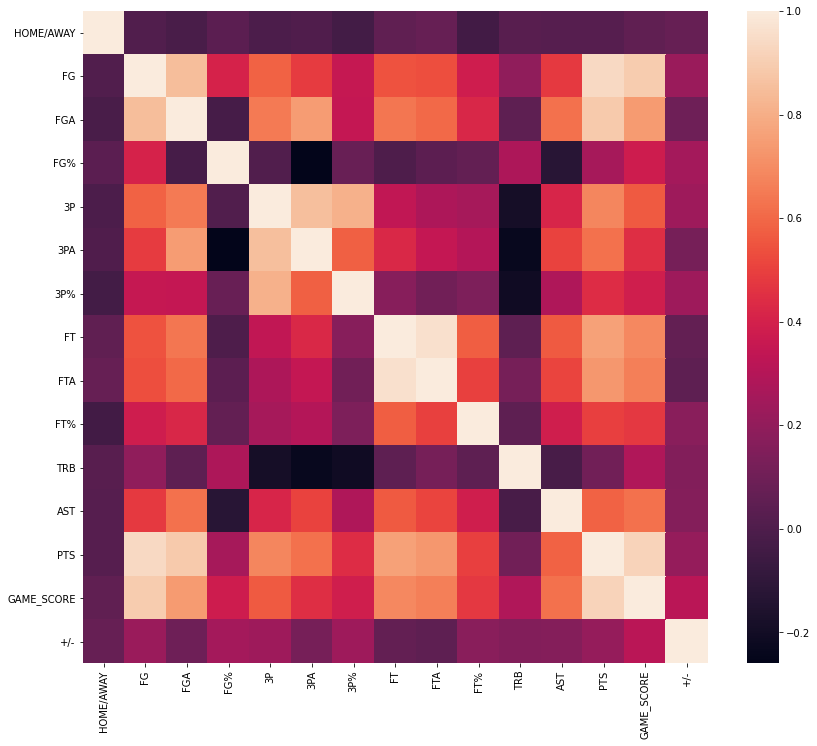

In [80]:

plt.figure(figsize=(14,12))
sns.heatmap(rockets_log_num.corr())

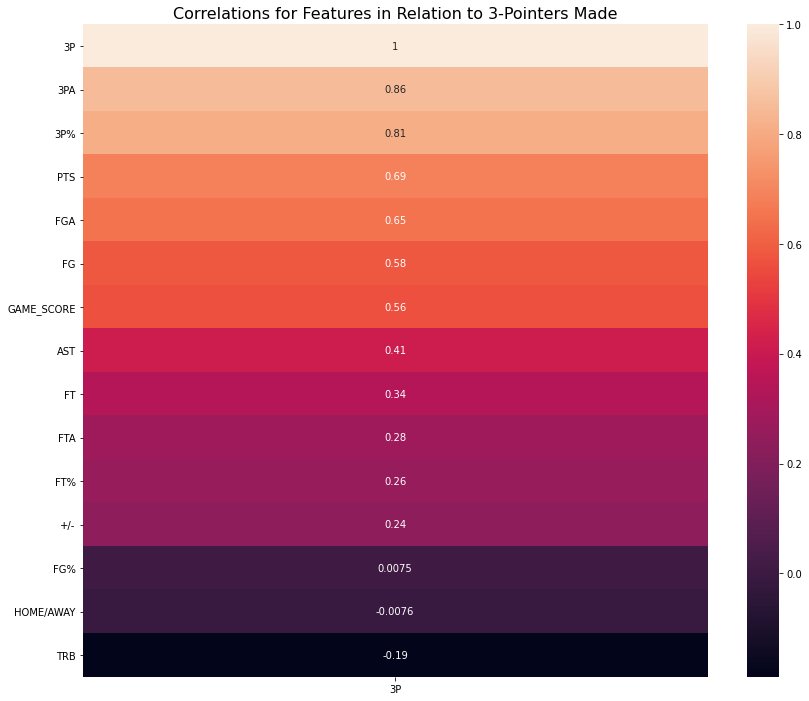

In [32]:
# Source: https://medium.com/@chrisshaw982/seaborn-correlation-heatmaps-customized-10246f4f7f4b
# Find the correlation to 3-pointers

plt.figure(figsize=(14,12))
sns.heatmap(rockets_log_num.corr()[['3P']].sort_values('3P', ascending=False), annot=True);
plt.title('Correlations for Features in Relation to 3-Pointers Made', size=16);

In [33]:
# Save numerical dataframe top csv file

rockets_log_num.to_csv('./data/rockets_log_num.csv', index=False)

In [19]:
rockets_17_18_df = get_roster_stats(team='HOU', season_end_year=2018, data_format='PER_GAME', playoffs=False)
rockets_17_18_df

,PLAYER,POS,AGE,TEAM,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SEASON
0,Ryan Anderson,PF,29,HOU,66,50,26.1,3.1,7.3,.431,...,1.4,3.6,5.0,0.9,0.4,0.3,0.6,1.9,9.3,2017-18
1,Trevor Ariza,SF,32,HOU,67,67,33.9,4.0,9.7,.412,...,0.5,3.9,4.4,1.6,1.5,0.2,0.8,2.0,11.7,2017-18
2,Tarik Black,C,26,HOU,51,2,10.5,1.5,2.5,.591,...,1.2,2.0,3.2,0.3,0.4,0.6,0.7,2.1,3.5,2017-18
3,Bobby Brown,PG,33,HOU,20,0,5.8,1.0,2.9,.328,...,0.0,0.4,0.4,0.6,0.2,0.0,0.5,0.3,2.5,2017-18
4,Markel Brown,SG,26,HOU,4,0,7.8,0.5,1.8,.286,...,0.3,1.0,1.3,0.5,0.0,0.0,0.5,1.5,1.3,2017-18
5,Isaiah Canaan,SG,26,HOU,1,0,4.0,0.0,1.0,.000,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-18
6,Clint Capela,C,23,HOU,74,74,27.5,6.0,9.1,.652,...,3.3,7.6,10.8,0.9,0.8,1.9,1.4,2.5,13.9,2017-18
7,Eric Gordon,SG,29,HOU,69,30,31.2,6.0,14.1,.428,...,0.4,2.1,2.5,2.2,0.6,0.4,1.9,1.7,18.0,2017-18
8,Gerald Green,SG,32,HOU,41,2,22.7,4.1,10.1,.407,...,0.4,2.9,3.2,0.6,0.6,0.4,0.8,2.1,12.1,2017-18
9,James Harden,SG,28,HOU,72,72,35.4,9.0,20.1,.449,...,0.6,4.8,5.4,8.8,1.8,0.7,4.4,2.3,30.4,2017-18


In [20]:
rockets_17_18_df.columns

Index(['PLAYER', 'POS', 'AGE', 'TEAM', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'SEASON'],
      dtype='object')

In [21]:
roster_stats_col = ['AGE', 'G', 'GS', 'MP', 'FG', 'FGA',
                    'FG%', '3P', '3PA', '3P%', '2P', '2PA',
                    '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
                    'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
                    'PF', 'PTS']

In [22]:
for col in roster_stats_col:
    rockets_17_18_df[col] = pd.to_numeric(rockets_17_18_df[col])

rockets_17_18_df.dtypes

PLAYER     object
POS        object
AGE         int64
TEAM       object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
SEASON     object
dtype: object

In [23]:
rockets_17_18_df.isnull().sum()

PLAYER    0
POS       0
AGE       0
TEAM      0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       3
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       5
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
SEASON    0
dtype: int64

In [24]:
rockets_17_18_df['3P%'].fillna(0, inplace=True)
rockets_17_18_df['FT%'].fillna(0, inplace=True)
rockets_17_18_df.isnull().sum()

PLAYER    0
POS       0
AGE       0
TEAM      0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
SEASON    0
dtype: int64

In [25]:
# Save dataframe in a csv file

rockets_17_18_df.to_csv('./data/rockets_17_18_df.csv', index=False)

In [26]:
rockets_17_18_df = pd.read_csv('./data/rockets_17_18_df.csv')
rockets_17_18_df.head()

,PLAYER,POS,AGE,TEAM,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SEASON
0,Ryan Anderson,PF,29,HOU,66,50,26.1,3.1,7.3,0.431,...,1.4,3.6,5.0,0.9,0.4,0.3,0.6,1.9,9.3,2017-18
1,Trevor Ariza,SF,32,HOU,67,67,33.9,4.0,9.7,0.412,...,0.5,3.9,4.4,1.6,1.5,0.2,0.8,2.0,11.7,2017-18
2,Tarik Black,C,26,HOU,51,2,10.5,1.5,2.5,0.591,...,1.2,2.0,3.2,0.3,0.4,0.6,0.7,2.1,3.5,2017-18
3,Bobby Brown,PG,33,HOU,20,0,5.8,1.0,2.9,0.328,...,0.0,0.4,0.4,0.6,0.2,0.0,0.5,0.3,2.5,2017-18
4,Markel Brown,SG,26,HOU,4,0,7.8,0.5,1.8,0.286,...,0.3,1.0,1.3,0.5,0.0,0.0,0.5,1.5,1.3,2017-18


#### Analyze the Numerical Data

In [27]:
rockets_17_18_num_df = rockets_17_18_df._get_numeric_data()

In [28]:
rockets_17_18_num_df

,AGE,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,29,66,50,26.1,3.1,7.3,0.431,2.0,5.1,0.386,...,0.774,1.4,3.6,5.0,0.9,0.4,0.3,0.6,1.9,9.3
1,32,67,67,33.9,4.0,9.7,0.412,2.5,6.9,0.368,...,0.854,0.5,3.9,4.4,1.6,1.5,0.2,0.8,2.0,11.7
2,26,51,2,10.5,1.5,2.5,0.591,0.0,0.2,0.091,...,0.460,1.2,2.0,3.2,0.3,0.4,0.6,0.7,2.1,3.5
3,33,20,0,5.8,1.0,2.9,0.328,0.6,2.0,0.275,...,0.500,0.0,0.4,0.4,0.6,0.2,0.0,0.5,0.3,2.5
4,26,4,0,7.8,0.5,1.8,0.286,0.3,1.3,0.200,...,0.000,0.3,1.0,1.3,0.5,0.0,0.0,0.5,1.5,1.3
5,26,1,0,4.0,0.0,1.0,0.000,0.0,0.0,0.000,...,0.000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,23,74,74,27.5,6.0,9.1,0.652,0.0,0.0,0.000,...,0.560,3.3,7.6,10.8,0.9,0.8,1.9,1.4,2.5,13.9
7,29,69,30,31.2,6.0,14.1,0.428,3.2,8.8,0.359,...,0.809,0.4,2.1,2.5,2.2,0.6,0.4,1.9,1.7,18.0
8,32,41,2,22.7,4.1,10.1,0.407,2.7,7.3,0.369,...,0.850,0.4,2.9,3.2,0.6,0.6,0.4,0.8,2.1,12.1
9,28,72,72,35.4,9.0,20.1,0.449,3.7,10.0,0.367,...,0.858,0.6,4.8,5.4,8.8,1.8,0.7,4.4,2.3,30.4


#### Drop Columns Deemed Unnecessary

In [29]:
rockets_17_18_num_df.drop(['AGE', 'GS', 'eFG%', 'ORB', 'DRB', 'STL', 'BLK', 'TOV', 'PF'], axis=1, inplace=True)

In [30]:
rockets_17_18_num_df

,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,TRB,AST,PTS
0,66,26.1,3.1,7.3,0.431,2.0,5.1,0.386,1.2,2.1,0.539,1.1,1.4,0.774,5.0,0.9,9.3
1,67,33.9,4.0,9.7,0.412,2.5,6.9,0.368,1.5,2.8,0.519,1.1,1.3,0.854,4.4,1.6,11.7
2,51,10.5,1.5,2.5,0.591,0.0,0.2,0.091,1.5,2.3,0.638,0.6,1.2,0.460,3.2,0.3,3.5
3,20,5.8,1.0,2.9,0.328,0.6,2.0,0.275,0.4,0.9,0.444,0.1,0.1,0.500,0.4,0.6,2.5
4,4,7.8,0.5,1.8,0.286,0.3,1.3,0.200,0.3,0.5,0.500,0.0,0.0,0.000,1.3,0.5,1.3
5,1,4.0,0.0,1.0,0.000,0.0,0.0,0.000,0.0,1.0,0.000,0.0,0.0,0.000,1.0,0.0,0.0
6,74,27.5,6.0,9.1,0.652,0.0,0.0,0.000,6.0,9.1,0.653,1.9,3.5,0.560,10.8,0.9,13.9
7,69,31.2,6.0,14.1,0.428,3.2,8.8,0.359,2.9,5.2,0.544,2.8,3.5,0.809,2.5,2.2,18.0
8,41,22.7,4.1,10.1,0.407,2.7,7.3,0.369,1.4,2.8,0.504,1.2,1.5,0.850,3.2,0.6,12.1
9,72,35.4,9.0,20.1,0.449,3.7,10.0,0.367,5.4,10.1,0.531,8.7,10.1,0.858,5.4,8.8,30.4


In [31]:
rockets_17_18_num_df['3P'].describe()

count    24.000000
mean      0.941667
std       1.175813
min       0.000000
25%       0.000000
50%       0.450000
75%       1.550000
max       3.700000
Name: 3P, dtype: float64

In [32]:
rockets_17_18_num_df['3P'].value_counts()

0.0    9
0.3    2
0.6    2
1.0    2
2.5    2
1.4    1
3.2    1
0.7    1
2.7    1
3.7    1
0.1    1
2.0    1
Name: 3P, dtype: int64

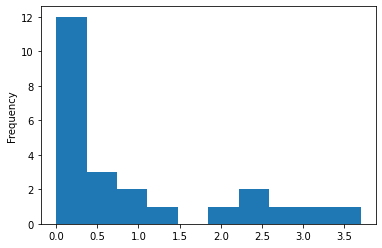

In [33]:
rockets_17_18_num_df['3P'].plot(kind='hist');

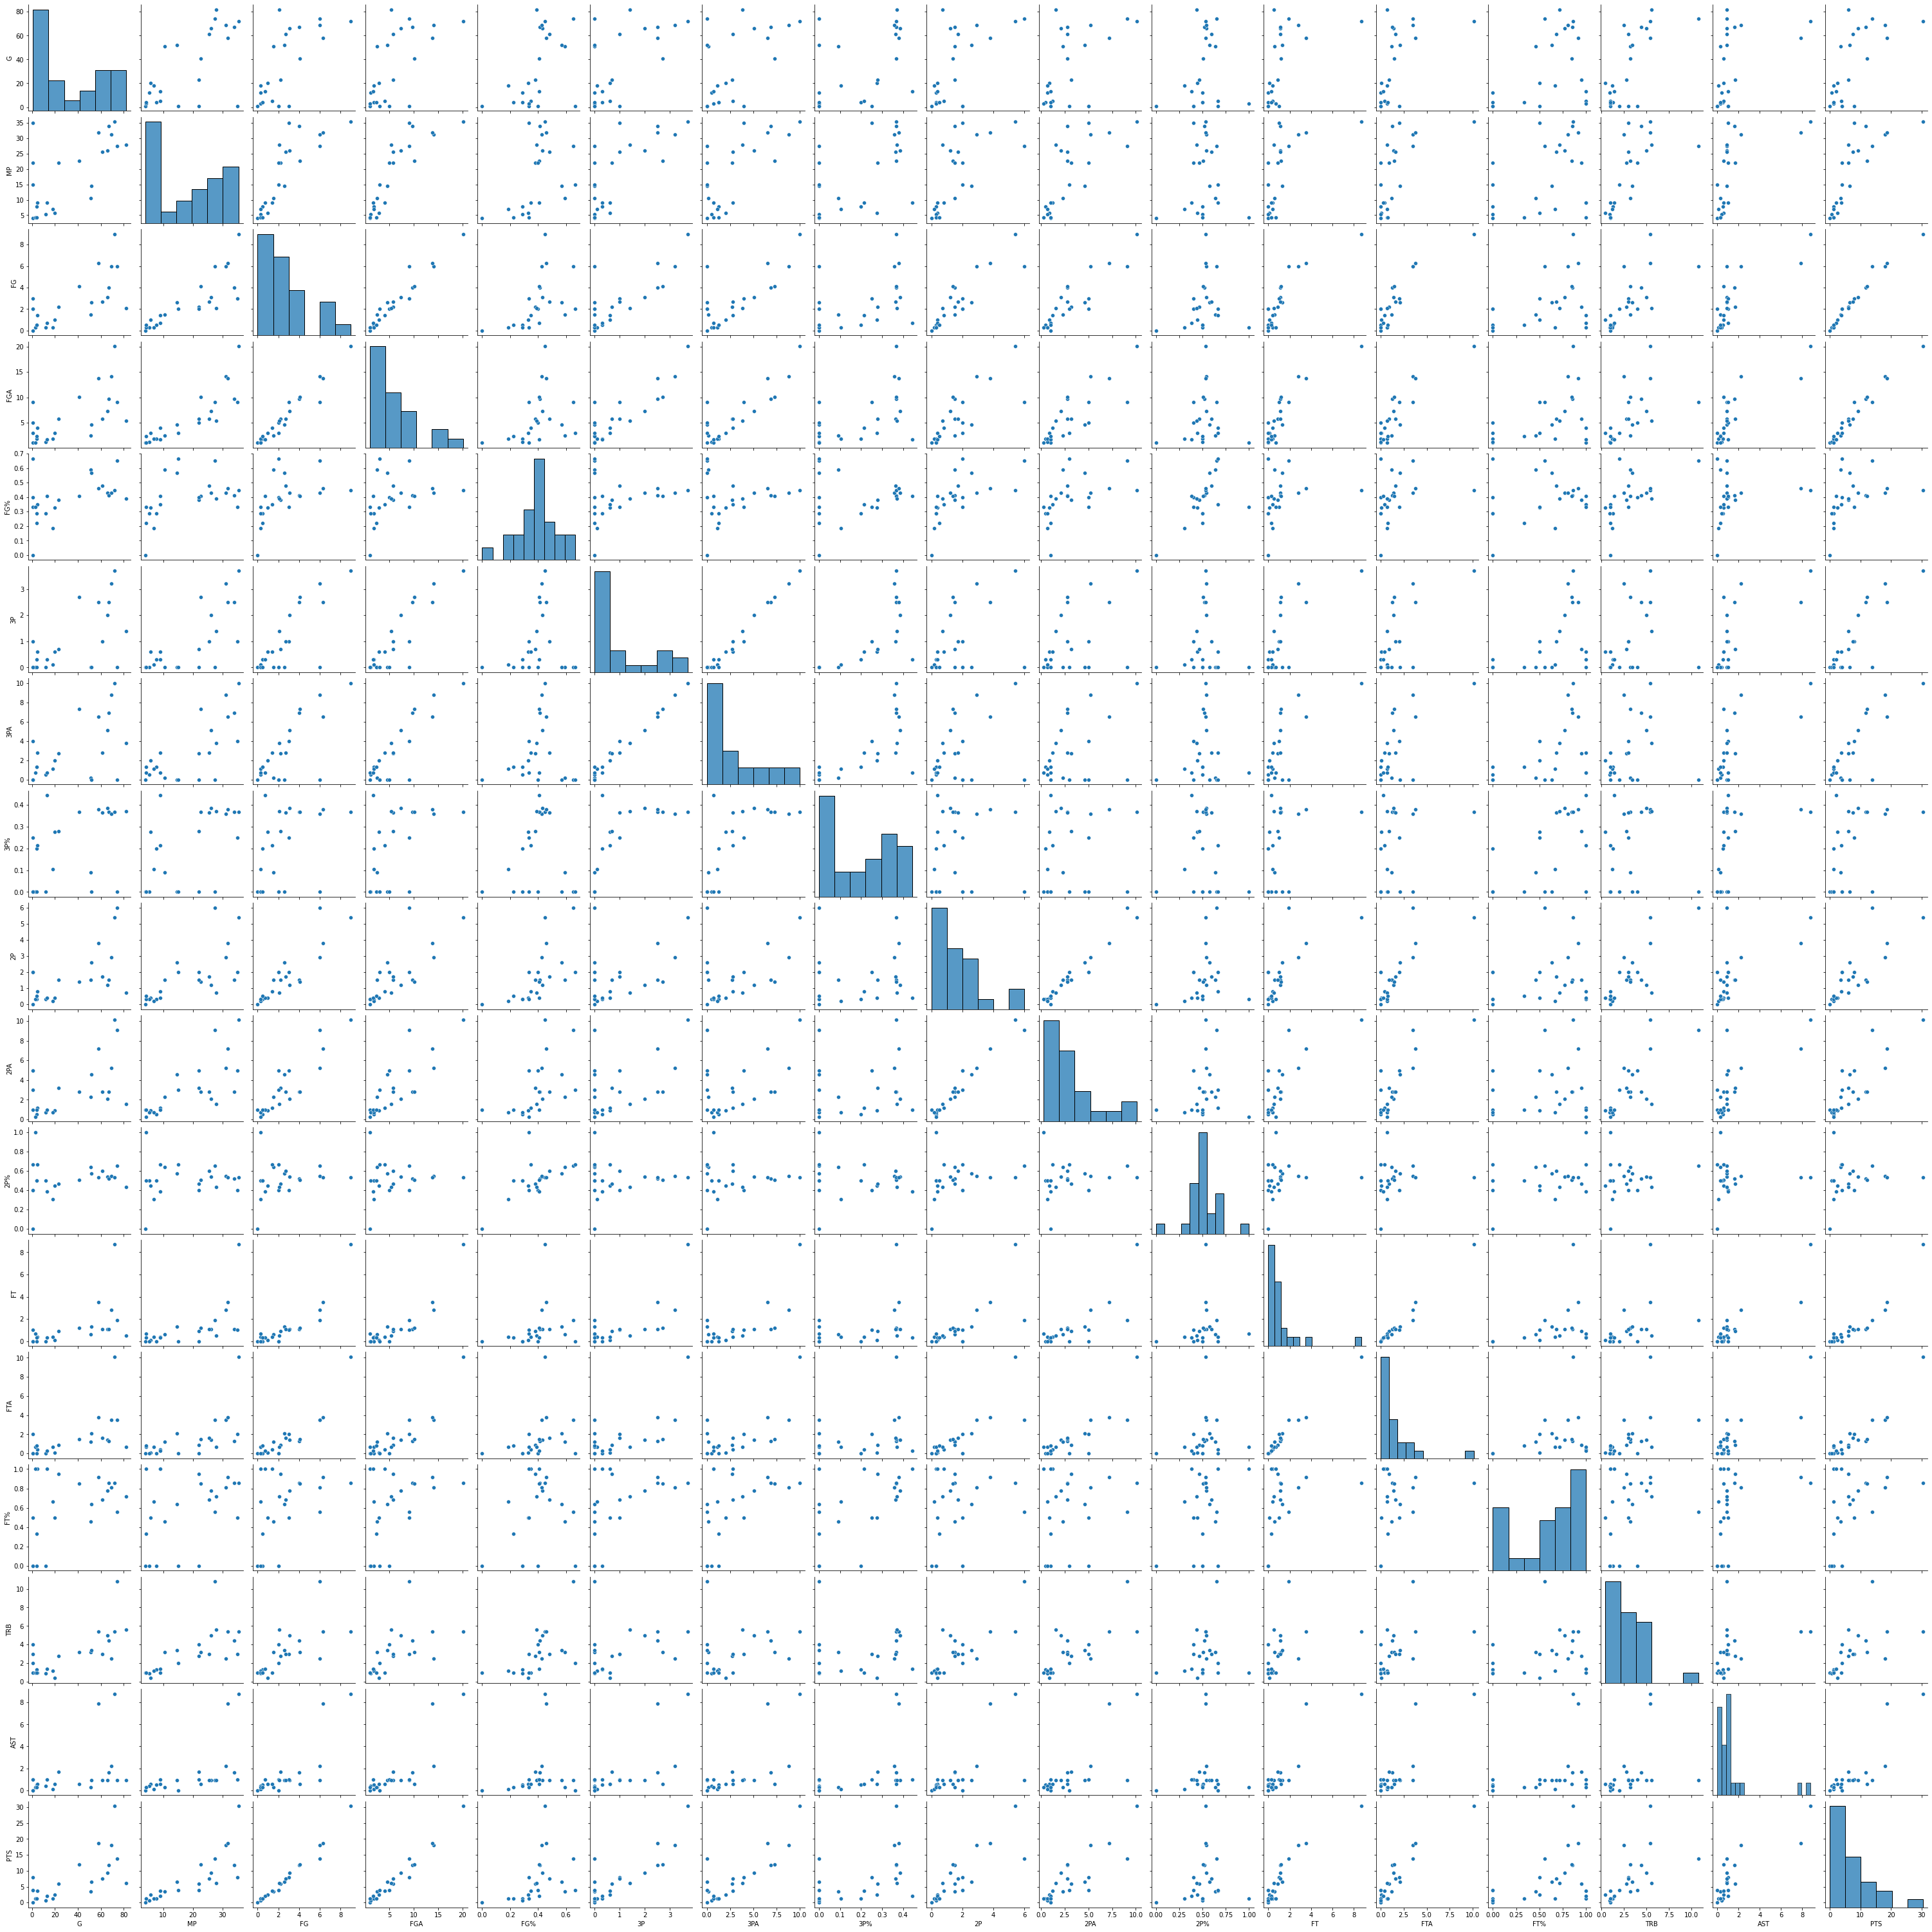

In [34]:
sns.pairplot(rockets_17_18_num_df);

<AxesSubplot:>

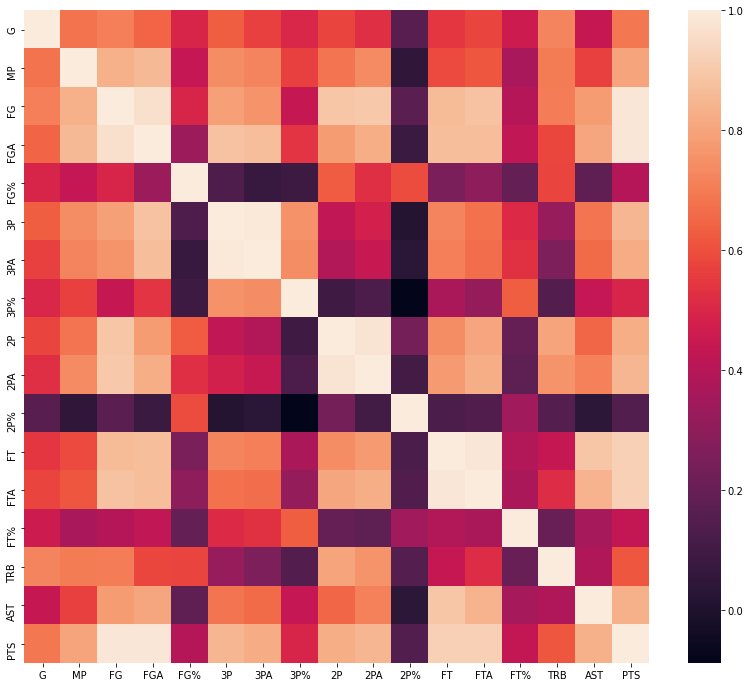

In [35]:
plt.figure(figsize=(14,12))
sns.heatmap(rockets_17_18_num_df.corr())

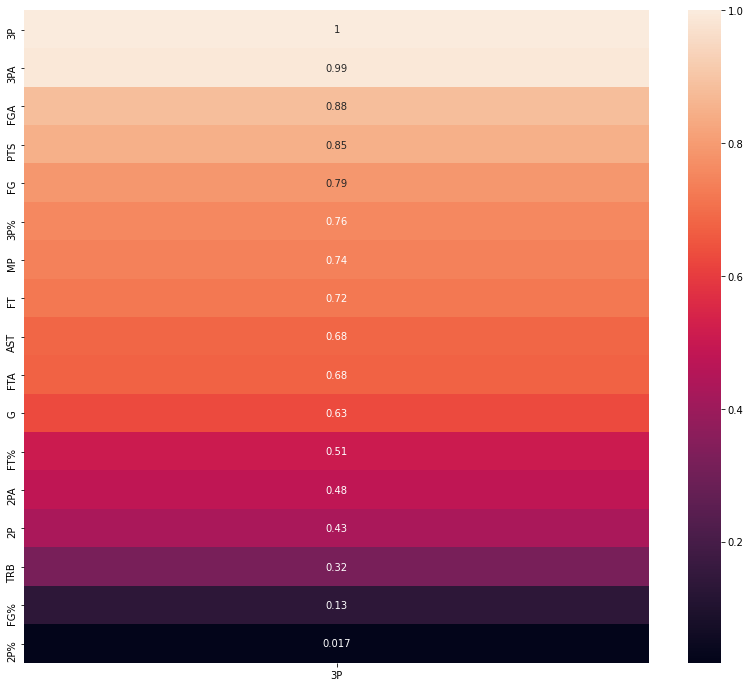

In [36]:
# Source: https://medium.com/@chrisshaw982/seaborn-correlation-heatmaps-customized-10246f4f7f4b

plt.figure(figsize=(14,12))
sns.heatmap(rockets_17_18_num_df.corr()[['3P']].sort_values('3P', ascending=False), annot=True);

## Sources
- https://www.basketball-reference.com/
- https://github.com/vishaalagartha/basketball_reference_scraper
- https://pypi.org/project/Unidecode/